# Non collinear calculations

## Packages

In [1]:
from quantumsparse.spin import SpinOperators
from quantumsparse.operator import Symmetry, roots_of_unity, Operator
from quantumsparse.spin.shift import shift
from quantumsparse.spin import Heisenberg
from quantumsparse.spin.functions import rotate_spins
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
plt.style.use('../../notebook.mplstyle')                # use matplotlib style notebook.mplstyle

## Spin operators

Let's define the main parameters of the system: the spin value `S` and the number of sites `Nsites`.

In [ ]:
name = "Cr8"
xc = "LDA+U"
all_Js = {
    "Cr8" : {
        "LDA+U"   : [0.596,0.596,0.843], # eV
        "LDA+U+V" : [0.848,0.848,1.198], # eV
    },
    "V8"  : {
        "LDA+U"   : [-0.643,-0.654,-0.913], # eV
        "LDA+U+V" : [-0.403,-0.403,-0.585], # eV
    }
}

S     = 3./2. # spin value
Nsites = 8 # number of sites
spin_values = np.full(Nsites,S)

From these values we can construct the spin operators `Sx`, `Sy`, and `Sz` of the system (in cartesian coordinates).

In [3]:
# construct the spin operators
SpinOp = SpinOperators(spin_values)

# unpack the operators
Sx,Sy,Sz = SpinOp.Sx,SpinOp.Sy,SpinOp.Sz


	computing the spin operators
		input parameters:
		             N spins : 8                                                           
		         spin values : [ 1.500000 , 1.500000 , 1.500000 , 1.500000 , 1.500000 , 1.500000 , 1.500000 , 1.500000  ]
		          dimensions : [ 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4  ]                          


In [4]:
# let's show the Hilbert space basis:
# each row is a basis state
# each column if one component in the Sz-basis
SpinOp.basis

,0,1,2,3,4,5,6,7
0,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5
1,1.5,1.5,1.5,1.5,1.5,1.5,1.5,0.5
2,1.5,1.5,1.5,1.5,1.5,1.5,1.5,-0.5
3,1.5,1.5,1.5,1.5,1.5,1.5,1.5,-1.5
4,1.5,1.5,1.5,1.5,1.5,1.5,0.5,1.5
...,...,...,...,...,...,...,...,...
65531,-1.5,-1.5,-1.5,-1.5,-1.5,-1.5,-0.5,-1.5
65532,-1.5,-1.5,-1.5,-1.5,-1.5,-1.5,-1.5,1.5
65533,-1.5,-1.5,-1.5,-1.5,-1.5,-1.5,-1.5,0.5
65534,-1.5,-1.5,-1.5,-1.5,-1.5,-1.5,-1.5,-0.5


Pay attention that `Sx` (as well as `Sy`, and `Sz`) are `numpy.array` with lenght `Nsites`, and each one of its element is a `Operator` object.

Let's inspect one element.

In [5]:
assert isinstance(Sx[0],Operator), "Sx[0] should be an Operator instance"
Sx[0]

          name: None
  memory (csr): 263052 bytes
 memory (deep): 264069 bytes
          type: float64
         shape: (65536, 65536)
      sparsity: 0.000023
         # all: 98304
         #  on: 0
         # off: 98304
    norm (all): 286.216701
    norm  (on): 0.000000
    norm (off): 286.216701
     hermitean: True
     symmetric: True
       unitary: False
     n. blocks: unknown
   eigenvalues: unknown
   eigenstates: unknown

## From cartesian to cylindrical frame

In [6]:
# EulerAngles = np.zeros((8,3))
# EulerAngles[:,2] = 360 - np.linspace(0,360,8,endpoint=False)
# EulerAngles = np.pi * EulerAngles / 180
# print("Euler angles (in radians):\n", EulerAngles)

# print("Delta uler angles (in deg):\n", np.diff(EulerAngles,axis=0)*180/np.pi)

In [7]:
# St,Sr,Sz= rotate_spins(spins=SpinOp,EulerAngles=EulerAngles)
# St[0]

In [8]:
# # let's construct a SpinOperator object for the cylindrical frame
# # pay attention: this is a hack!
# SpinOpCyl = deepcopy(SpinOp)
# SpinOpCyl.Sx = St
# SpinOpCyl.Sy = Sr
# del SpinOpCyl.Sp # it should not be needed
# del SpinOpCyl.Sm # it should not be needed

## Hamiltonian

Let's construct the hamiltonian.

In [ ]:
# cylindricar coordinates

# Js = [-0.643,-0.654,-0.913] # V8, LDA+U, eV
# Js = [-0.403,-0.403,-0.585] # V8, LDA+U+V, eV
# Js = [0.596,0.596,0.843] # Cr8, LDA+U, eV
# Js = [0.848,0.848,1.198] # Cr8, LDA+U+V, eV
Js = all_Js[name][xc]

H = Heisenberg(Sx,Sy,Sz,Js) # Hamiltonian in cartesian coordinates
# H = Heisenberg(St,Sr,Sz,Js) # Hamiltonian in cyclindrical coordinates
H

          name: None
  memory (csr): 263052 bytes
 memory (deep): 264069 bytes
          type: complex128
         shape: (65536, 65536)
      sparsity: 0.000151
         # all: 648304
         #  on: 58480
         # off: 589824
    norm (all): 1534.242194
    norm  (on): 1084.305823
    norm (off): 1085.440000
     hermitean: True
     symmetric: True
       unitary: False
     n. blocks: unknown
   eigenvalues: unknown
   eigenstates: unknown

## Symmetry operators

Let's construct the shift operator (or traslation operator) because it will be usefull later on to make the diagonalization of the Hamiltoninan cheaper.

In [10]:
D = Symmetry.load(f"D.S={S}.N={Nsites}.pickle") # save the symmetry operator to a file
# D:Symmetry = shift(SpinOp)
# D:Symmetry = shift(SpinOpCyl) # D is a symmetry operator that shifts the spin operators
D

          name: None
  memory (csr): 904 bytes
 memory (deep): 3567 bytes
          type: float64
         shape: (65536, 65536)
      sparsity: 0.000015
         # all: 65536
         #  on: 4
         # off: 65532
    norm (all): 256.000000
    norm  (on): 2.000000
    norm (off): 255.992187
     hermitean: False
     symmetric: False
       unitary: True
     n. blocks: 8230
   eigenvalues: computed
   eigenstates: computed

Let's diagonalize the shift operator so that we have access to its eigenvectors.

In [ ]:
D.diagonalize(method="dense") # 'dense' is much better than 'jacobi'

In [12]:
# let's inspect again the symmetry operator
D

          name: None
  memory (csr): 1032 bytes
 memory (deep): 1576407 bytes
          type: float64
         shape: (65536, 65536)
      sparsity: 0.000015
         # all: 65536
         #  on: 4
         # off: 65532
    norm (all): 256.000000
    norm  (on): 2.000000
    norm (off): 255.992187
     hermitean: False
     symmetric: False
       unitary: True
     n. blocks: 8230
   eigenvalues: computed
   eigenstates: computed

In [13]:
test = D.test_eigensolution() # return a matrix that measures the discrepancy between the operator and its eigenvectors
assert test.norm() < 1e-10, "Test eigen solution failed, discrepancy is too high"

# the number of energy levels should be equal to the number of sites
l,N = D.energy_levels()
# print(len(l))
assert len(l) == Nsites, "wrong number of energy levels"

# the eigenvalues should be the roots of unity
ru = np.sort(roots_of_unity(len(spin_values)))
l  = np.sort(l)    
assert np.allclose(l,ru), "The eigenvalues should be the roots of the unity."


test

          name: None
  memory (csr): 263180 bytes
 memory (deep): 264235 bytes
          type: complex128
         shape: (65536, 65536)
      sparsity: 0.000122
         # all: 523200
         #  on: 65520
         # off: 457680
    norm (all): 0.000000
    norm  (on): 0.000000
    norm (off): 0.000000
     hermitean: True
     symmetric: True
       unitary: False
     n. blocks: unknown
   eigenvalues: unknown
   eigenstates: unknown

Let' save the shift operator, and its eigensolutions to file.

In [14]:
D.save(f"D.S={S}.N={Nsites}.pickle") # save the symmetry operator to a file

## Diagonalizing the Hamiltonian

In [15]:
comm = Operator.commutator(H,D);
assert comm.norm() < 1e-10, "Commutator is not zero, the symmetry operator does not commute with the Hamiltonian"

In [ ]:
H.diagonalize_with_symmetry(S=[D],method="dense"); # diagonalize the Hamiltonian

In [17]:
test = H.test_eigensolution() # test the eigen solution of the Hamiltonian
assert test.norm() < 1e-10, "Test eigen solution failed, discrepancy is too high"

In [ ]:
H.save(f"{name}.xc={xc}.pickle") # save the symmetry operator to a file

## Density of states

In [18]:
l, N = H.energy_levels() # return the energy levels of the Hamiltonian
assert N.sum() == H.shape[0], "The sum of the energy level weights should be equal to the number of sites"
print(f"Found {len(l)} energy levels")

Found 23025 energy levels


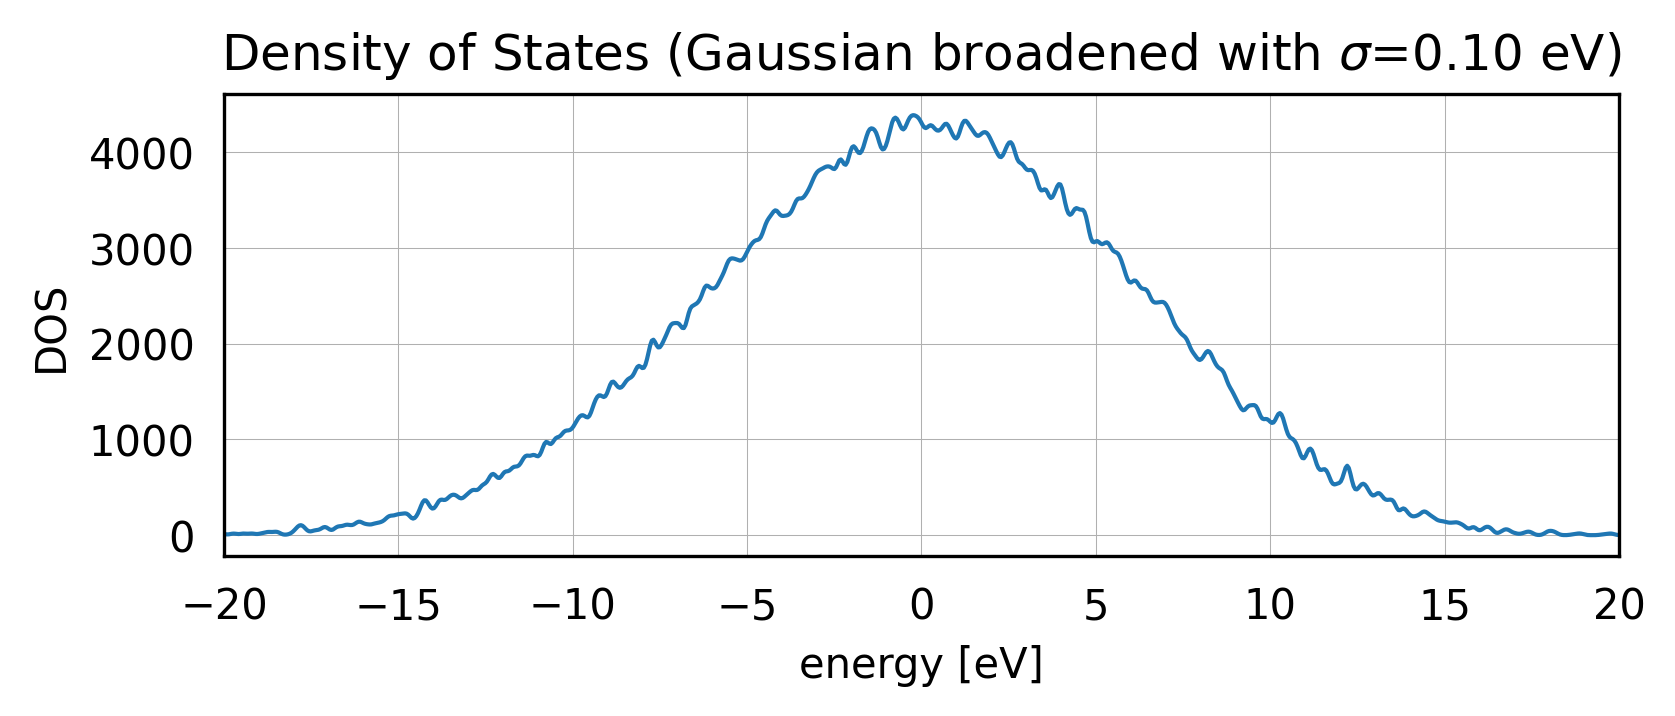

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example: assume l and N are already defined
# l: array of energy levels
# N: degeneracies (or set to 1 if not available)

# If N not given, use uniform weights:
# N = np.ones_like(l)

# Parameters
sigma = 0.1  # Width of Gaussian
E_min, E_max = l.min() - 2*sigma, l.max() + 2*sigma
E_vals = np.linspace(E_min, E_max, 1000)

# Initialize DOS array
dos = np.zeros_like(E_vals)

# Manually compute Gaussian for each energy level
prefactor = 1 / (sigma * np.sqrt(2 * np.pi))
for energy, weight in zip(l, N):
    gaussian = weight * prefactor * np.exp(-0.5 * ((E_vals - energy) / sigma)**2)
    dos += gaussian

# Plotting
plt.plot(E_vals, dos)
plt.xlabel('energy [eV]')
plt.ylabel('DOS')
plt.title(r'Density of States (Gaussian broadened with $\sigma$={:.2f} eV)'.format(sigma))
plt.grid(True)
# plt.xlim(-20,20)
# plt.legend()
plt.show()
plt.savefig(f"{name}.xc={xc}.pdf", bbox_inches='tight')
